In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pickle

import warnings
warnings.filterwarnings("ignore")

In [321]:
df=pd.read_csv("predict_car.csv")

In [5]:
df.head(4)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol


In [9]:
df.shape

(892, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [38]:
#df["name"].unique()
#df["company"].unique()
#df["year"].unique() 
#df["Price"].unique()
#df["kms_driven"].unique()
#df["fuel_type"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

## Quality
- year has many non-year values
- year oject to int
- price has  Ask for Price
- -Price object to int
- kms_driven has kms with integers
- kms_driven object to int
- kms_driven has non vlaues
- fuel_type has nan values
- keep first 3 word of name
- 

## Cleaning

In [323]:
backup =df.copy()

In [101]:
backup.head(2)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel


In [103]:
df["year"].isna().any


<bound method Series.any of 0      False
1      False
2      False
3      False
4      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: year, Length: 892, dtype: bool>

In [325]:
df=df[df["year"].str.isnumeric()]

In [327]:
df["year"]=df["year"].astype(int)

In [329]:
df=df[df["Price"] != "Ask For Price"]

In [131]:
df.shape

(819, 6)

In [331]:
df["Price"] = df["Price"].str.replace(',','').astype(int)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [150]:
df["kms_driven"].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [333]:
df["kms_driven"]=df["kms_driven"].str.split(" ").str.get(0).str.replace(",","")

In [162]:
df["kms_driven"] #we still has Petrol

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

In [335]:
df=df[df["kms_driven"].str.isnumeric()]

In [168]:
df.shape

(817, 6)

In [337]:
df["kms_driven"]=df["kms_driven"].astype(int)

In [220]:
df.info

<bound method DataFrame.info of                        name   company  year   Price  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007   80000       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006  425000          40    Diesel
3         Hyundai Grand i10   Hyundai  2014  325000       28000    Petrol
4    Ford EcoSport Titanium      Ford  2014  575000       36000    Diesel
6                 Ford Figo      Ford  2012  175000       41000    Diesel
..                      ...       ...   ...     ...         ...       ...
883      Maruti Suzuki Ritz    Maruti  2011  270000       50000    Petrol
885          Tata Indica V2      Tata  2009  110000       30000    Diesel
886    Toyota Corolla Altis    Toyota  2009  300000      132000    Petrol
888            Tata Zest XM      Tata  2018  260000       27000    Diesel
889      Mahindra Quanto C8  Mahindra  2013  390000       40000    Diesel

[816 rows x 6 columns]>

In [192]:
df["fuel_type"].isna().any()

True

In [339]:
df=df[~df["fuel_type"].isna()]

In [202]:
df.isna().any().any()

False

In [204]:
df["name"]

0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
6                                   Ford Figo
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [341]:
df["name"]=df["name"].str.split(" ").str.slice(0,3).str.join(" ") 

In [210]:
df["name"]

0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 816, dtype: object

In [343]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [429]:
df.to_csv('Cleaned_df.csv')

In [431]:
df.shape

(815, 6)

In [222]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [345]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [347]:
df=df[df['Price']<6000000]

In [349]:
df.shape

(815, 6)

In [238]:
df.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


In [ ]:
#price-company

C:\Users\ralpa\AppData\Local\Temp\ipykernel_19200\2542949662.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


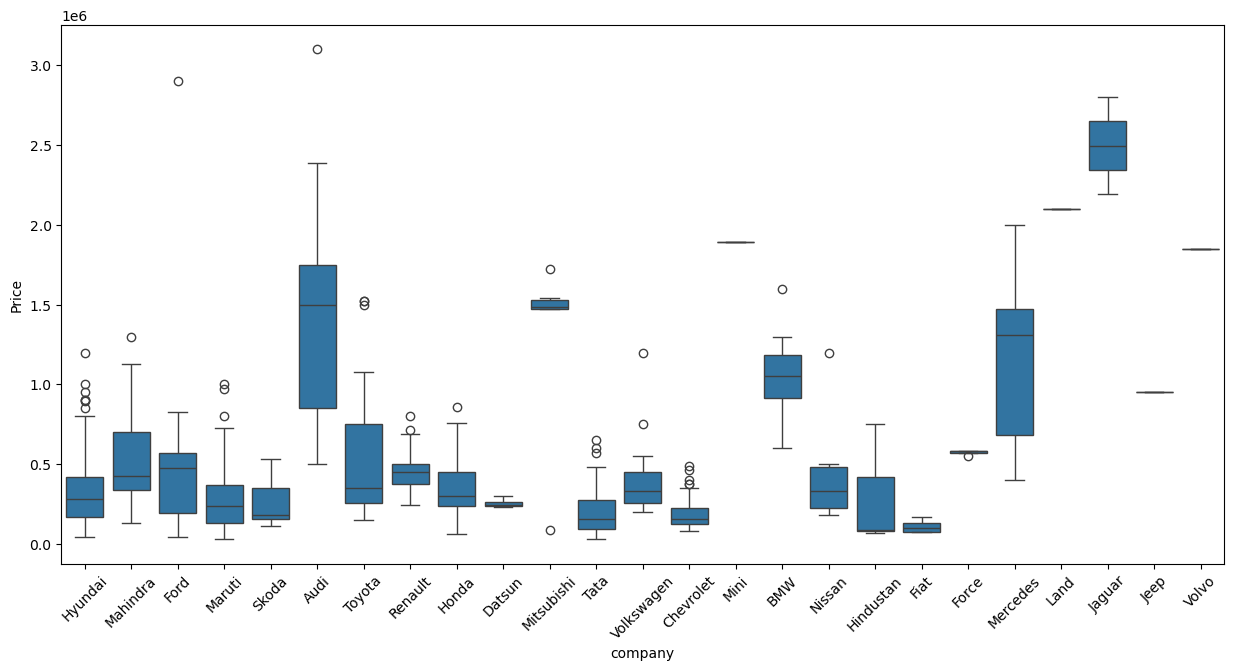

In [351]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x="company",y="Price",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()
#we have outlier

In [252]:
#year with price

C:\Users\ralpa\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ralpa\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ralpa\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ralpa\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ralpa\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.6% of the points 

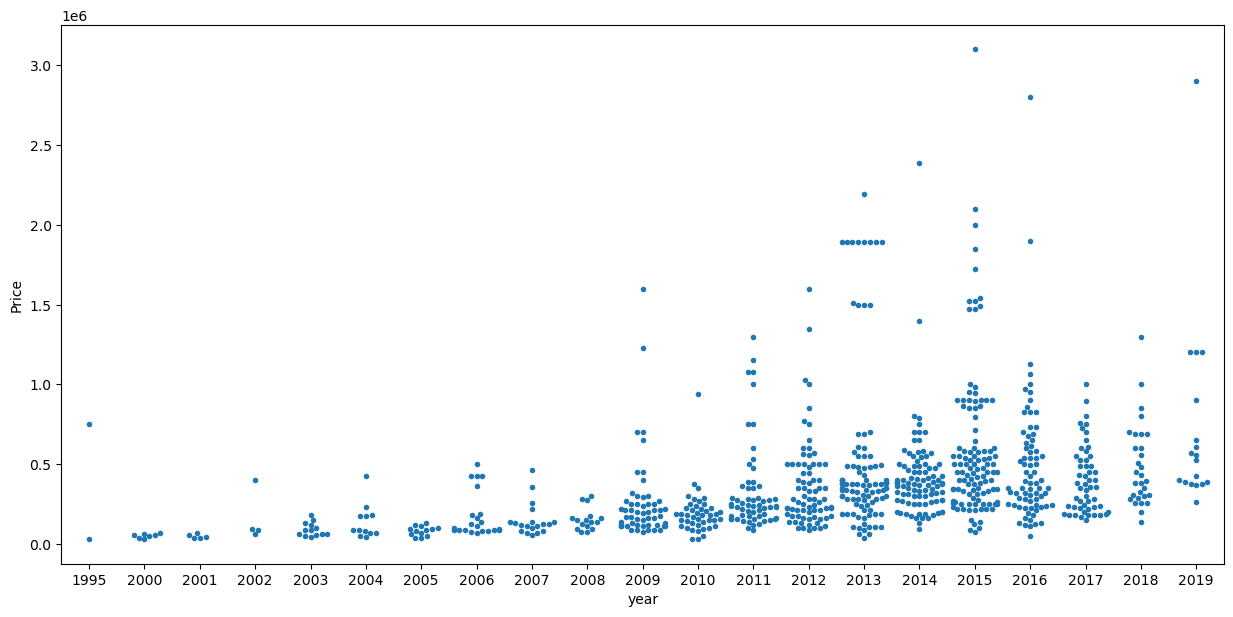

In [353]:
plt.subplots(figsize=(15,7))
axes=sns.swarmplot(x="year",y="Price",data=df,size=4)
axes.set_xticklabels(axes.get_xticklabels())
plt.show()
#The average value has grown every year

C:\Users\ralpa\AppData\Local\Temp\ipykernel_19200\3177591872.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), ha="right")


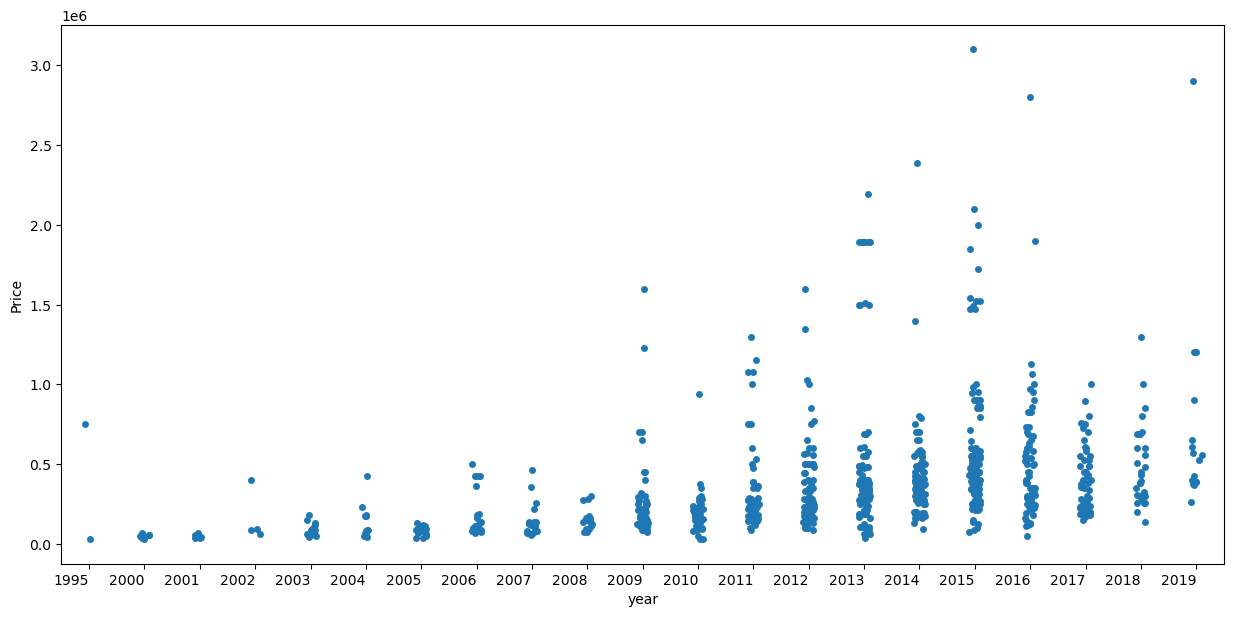

In [258]:
plt.subplots(figsize=(15,7))
axes = sns.stripplot(x="year", y="Price", data=df)
axes.set_xticklabels(axes.get_xticklabels(), ha="right")
plt.show()


In [268]:
#kms_driven , Price

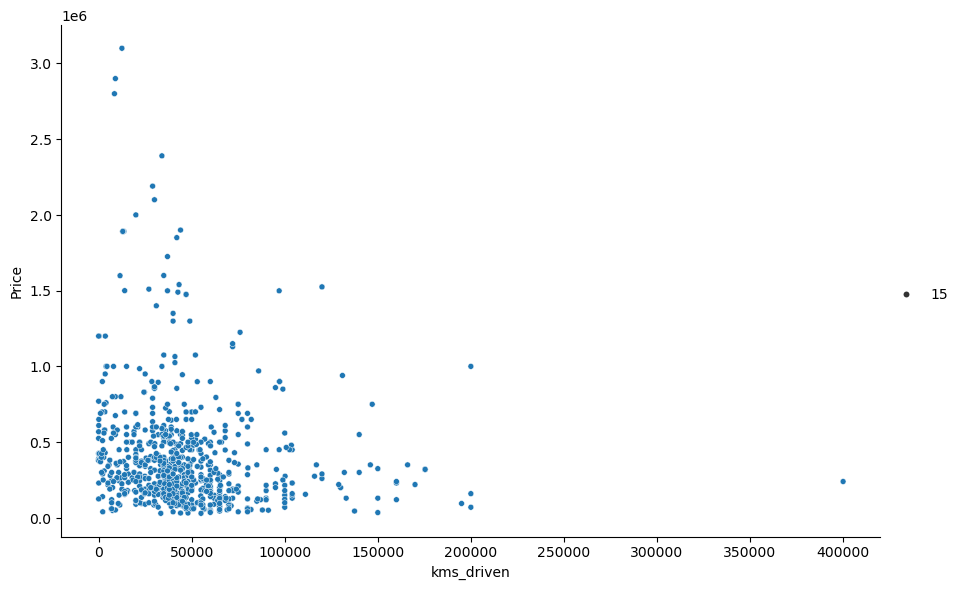

In [290]:
sns.relplot(x="kms_driven",y="Price",data=df,height=6,aspect=1.5)
plt.show()

In [292]:
#Fuel Type , Price

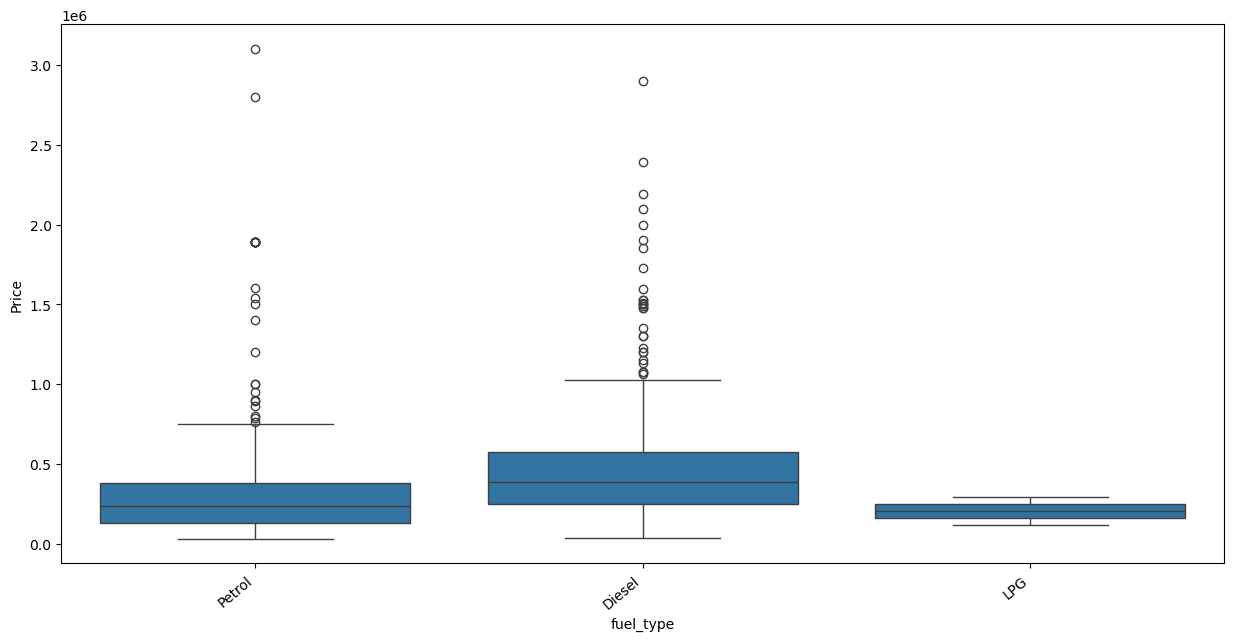

In [310]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x="fuel_type",y="Price",data=df)
plt.xticks(rotation=40, ha="right")
#ax.set_xticklabels(ax.get_xticklabels())
plt.show()

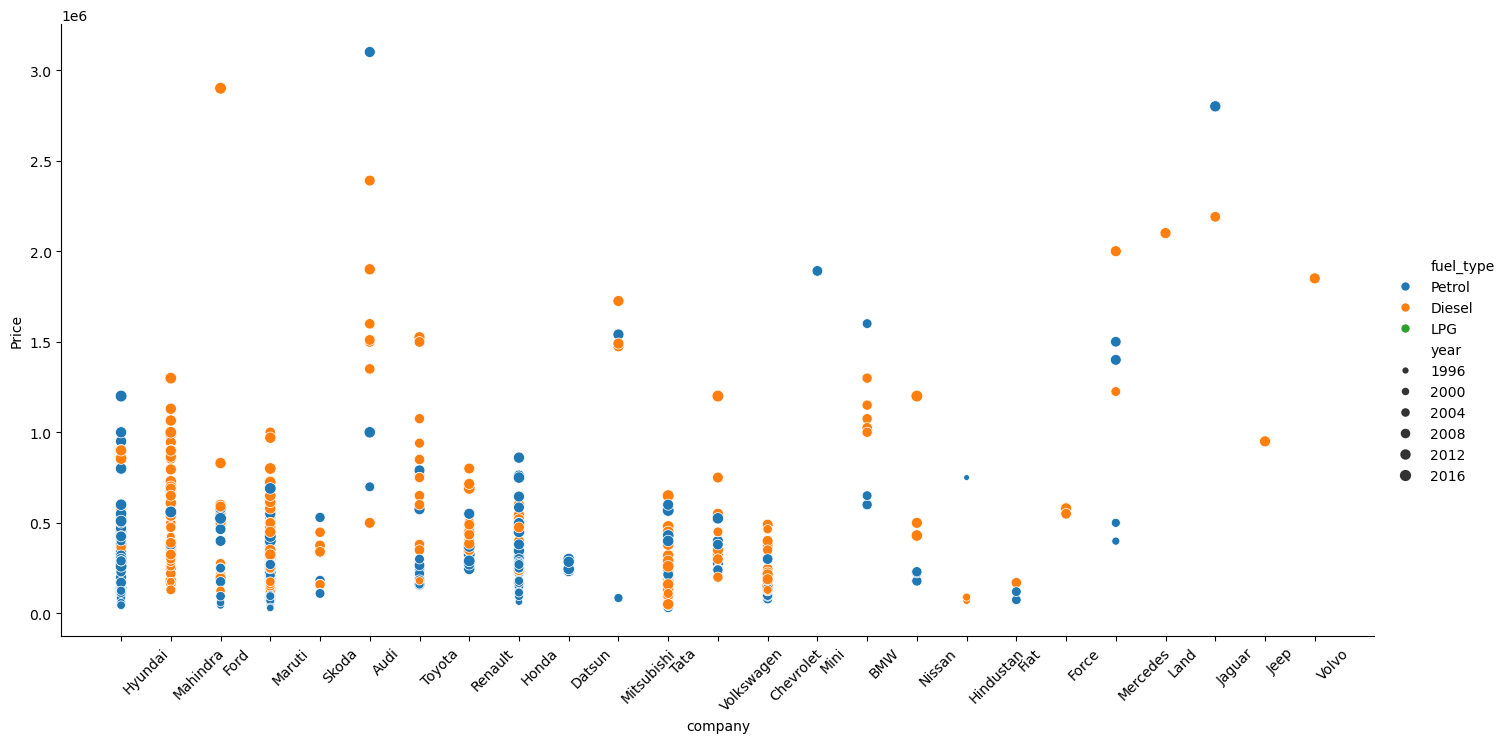

In [363]:
ax=sns.relplot(x='company',y='Price',data=df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=45,ha="left")

In [369]:
df.head(1)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol


In [379]:
X=df.drop(["Price"],axis=1)

In [381]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
885,Tata Indica V2,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM,Tata,2018,27000,Diesel


In [371]:
y=df["Price"]

In [377]:
y

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 815, dtype: int32

In [385]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [391]:
ohe=OneHotEncoder()

In [395]:
ohe.fit(X[["name","company","fuel_type"]])

OneHotEncoder()

In [399]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),["name","company","fuel_type"]),remainder="passthrough")

In [401]:
lr=LinearRegression()

In [403]:
pipe=make_pipeline(column_trans,lr)

In [405]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [407]:
y_pred=pipe.predict(X_test)

In [409]:
r2_score(y_test,y_pred)

0.573163946242421

In [411]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [413]:
np.argmax(scores)

302

In [415]:
scores[np.argmax(scores)]

0.8991138463319752

In [423]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [425]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))


array([430287.74002343])